In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
store_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-project/yt-train.csv')

In [4]:
store_sales['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [5]:
store_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [6]:
store_sales.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [7]:
items = store_sales[['store', 'item']].copy()

In [8]:
items

,store,item
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
912995,10,50
912996,10,50
912997,10,50
912998,10,50


In [9]:
store_sales = store_sales.drop(['store', 'item'], axis=1)

In [10]:
store_sales.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [11]:
store_sales['date'] = pd.to_datetime(store_sales['date'])

In [12]:
store_sales['date'] = store_sales['date'].dt.to_period("M")
monthly_sales = store_sales.groupby('date').sum().reset_index()

In [13]:
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()

In [14]:
monthly_sales.head(30)

,date,sales
0,2013-01-01,454904
1,2013-02-01,459417
2,2013-03-01,617382
3,2013-04-01,682274
4,2013-05-01,763242
5,2013-06-01,795597
6,2013-07-01,855922
7,2013-08-01,766761
8,2013-09-01,689907
9,2013-10-01,656587


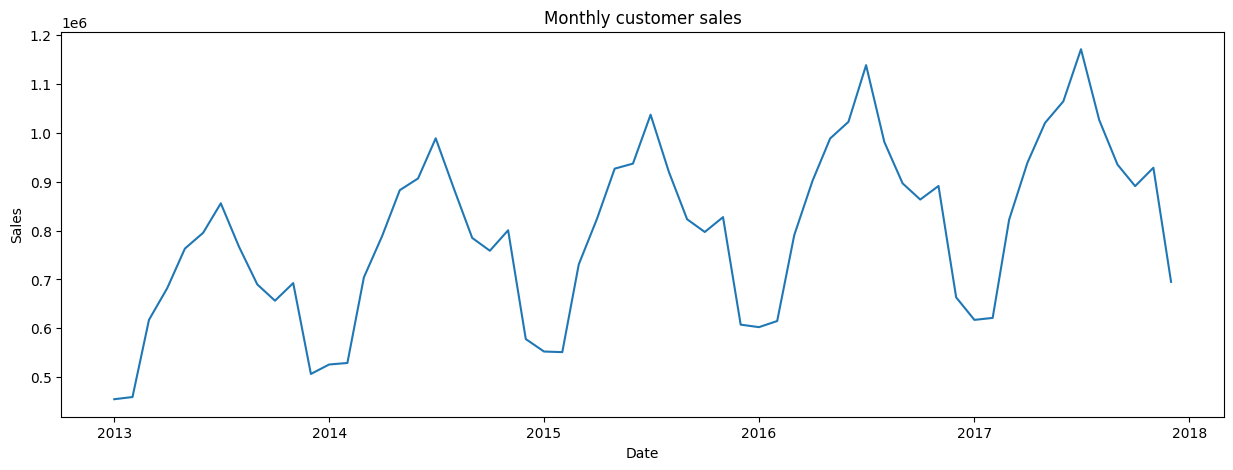

In [15]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly customer sales")
plt.show()

In [16]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.head(10)

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0
6,2013-07-01,855922,60325.0
7,2013-08-01,766761,-89161.0
8,2013-09-01,689907,-76854.0
9,2013-10-01,656587,-33320.0
10,2013-11-01,692643,36056.0


In [17]:
df_diff = monthly_sales.copy()
df_diff['prev_sales'] = df_diff['sales'].shift(1)
df_diff = df_diff.dropna()
df_diff['diff'] = (df_diff['sales'] - df_diff['prev_sales'])
df_diff.head(10)

,date,sales,sales_diff,prev_sales,diff
2,2013-03-01,617382,157965.0,459417.0,157965.0
3,2013-04-01,682274,64892.0,617382.0,64892.0
4,2013-05-01,763242,80968.0,682274.0,80968.0
5,2013-06-01,795597,32355.0,763242.0,32355.0
6,2013-07-01,855922,60325.0,795597.0,60325.0
7,2013-08-01,766761,-89161.0,855922.0,-89161.0
8,2013-09-01,689907,-76854.0,766761.0,-76854.0
9,2013-10-01,656587,-33320.0,689907.0,-33320.0
10,2013-11-01,692643,36056.0,656587.0,36056.0
11,2013-12-01,506607,-186036.0,692643.0,-186036.0


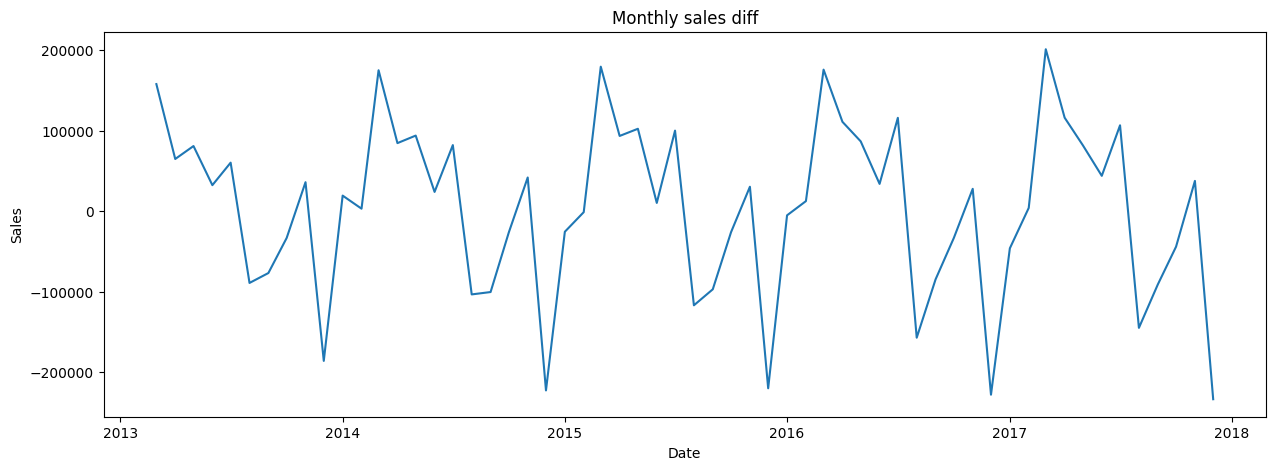

In [18]:
plt.figure(figsize=(15,5))
plt.plot(df_diff['date'], df_diff['diff'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Monthly sales diff")
plt.show()

In [19]:
supervised_data = monthly_sales.drop(['date', 'sales'], axis=1)

In [20]:
for i in range (1,13):
  col_name = 'month_' + str(i)
  supervised_data[col_name] = supervised_data['sales_diff'].shift(i)
supervised_data = supervised_data.dropna().reset_index(drop=True)
supervised_data.head(10)


,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [21]:
supervised_data.head()

,sales_diff,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0


In [22]:
train_data = supervised_data[:-12]
test_data = supervised_data[-12:]
print("Train data shape: ", train_data.shape)
print("Testdata shape: ", test_data.shape)

Train data shape:  (35, 13)
Testdata shape:  (12, 13)


In [23]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [24]:
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (35, 12)
y_train shape:  (35,)
X_test shape:  (12, 12)
y_test shape:  (12,)


In [25]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [26]:
act_sales = monthly_sales['sales'][-13:].to_list()
print(act_sales)

[663411, 617306, 621369, 822667, 938862, 1020686, 1064624, 1171393, 1026403, 935263, 891160, 928837, 695170]


In [27]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pre = lr_model.predict(X_test)

In [28]:
lr_pre = lr_pre.reshape(-1,1)
lr_pre_test_set = np.concatenate([lr_pre, X_test], axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [29]:
result_list = []
for index in range(0, len(lr_pre_test_set)):
  result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pre_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index=True, right_index=True)

In [30]:
print(predict_df)

         date  Linear Prediction
0  2017-01-01       6.479148e+05
1  2017-02-01       6.283374e+05
2  2017-03-01       8.195190e+05
3  2017-04-01       9.436391e+05
4  2017-05-01       1.033653e+06
5  2017-06-01       1.065286e+06
6  2017-07-01       1.201561e+06
7  2017-08-01       1.002123e+06
8  2017-09-01       9.415142e+05
9  2017-10-01       9.080646e+05
10 2017-11-01       9.167461e+05
11 2017-12-01       6.947978e+05


In [31]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:]))
print("Linear Regression MSE:", lr_mse)
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
print("Linear Regression MAE:", lr_mae)
lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
# lr_r2 = r2_score(predict_df['Linear Prediction'], monthly_sales['sales'][-12:])
print("Linear Regression R2:", lr_r2)

Linear Regression MSE: 16221.272385416869
Linear Regression MAE: 12433.184266490736
Linear Regression R2: 0.9906152516380969


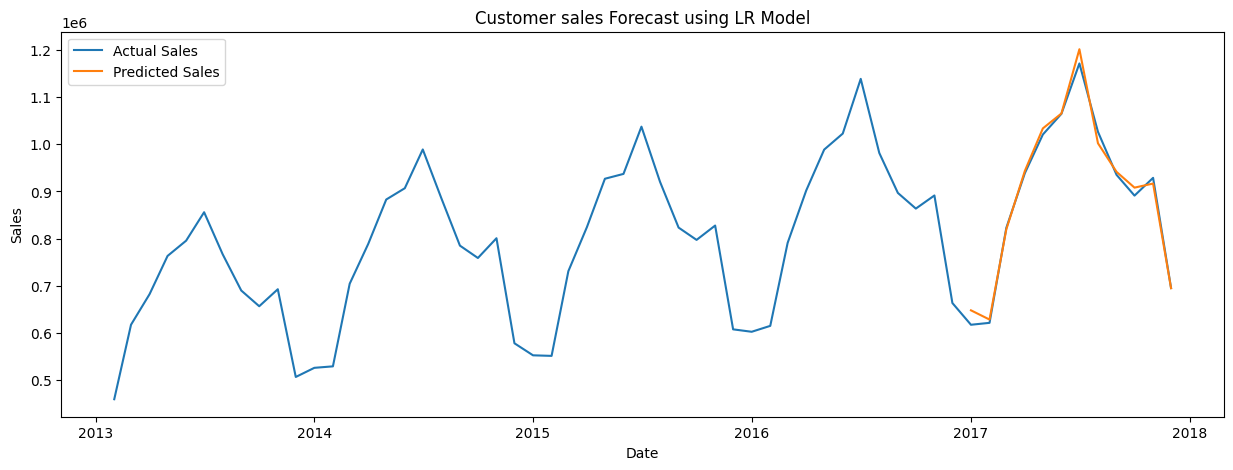

In [32]:
plt.figure(figsize=(15,5))
plt.plot(monthly_sales['date'], monthly_sales['sales'])
plt.plot(predict_df['date'], predict_df['Linear Prediction'])
plt.title("Customer sales Forecast using LR Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Actual Sales", "Predicted Sales"])

In [33]:
monthly_sales.head()

,date,sales,sales_diff
1,2013-02-01,459417,4513.0
2,2013-03-01,617382,157965.0
3,2013-04-01,682274,64892.0
4,2013-05-01,763242,80968.0
5,2013-06-01,795597,32355.0


In [35]:
item_sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-project/yt-train.csv')

In [36]:
item_sales.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [37]:
item_sales.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [38]:
item_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [39]:
item_sales['date'] = pd.to_datetime(item_sales['date'])

In [40]:
item_1_data = item_sales[item_sales['item'] == 1].copy()

In [41]:
item_1_data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [42]:
item_1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18260 entries, 0 to 18259
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    18260 non-null  datetime64[ns]
 1   store   18260 non-null  int64         
 2   item    18260 non-null  int64         
 3   sales   18260 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 713.3 KB


In [43]:
item_1_data['date'] = pd.to_datetime(item_1_data['date'])
monthly_sales = item_1_data.resample('M', on='date').sum()

In [44]:
item_1_data['item'].unique()

array([1])

In [45]:
monthly_sales['item'] = 1

In [46]:
monthly_sales

,store,item,sales
date,,,
2013-01-31,1705,1,3794
2013-02-28,1540,1,3863
2013-03-31,1705,1,5190
2013-04-30,1650,1,5783
2013-05-31,1705,1,6298
2013-06-30,1650,1,6739
2013-07-31,1705,1,7107
2013-08-31,1705,1,6492
2013-09-30,1650,1,5693


In [47]:
lag_months = 12
for lag in range(1, lag_months + 1):
    monthly_sales[f'sales_lag_{lag}'] = monthly_sales['sales'].shift(lag)

In [48]:
monthly_sales.dropna(inplace=True)

In [49]:
X = monthly_sales.drop(columns=['sales'])
y = monthly_sales['sales']

In [50]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

In [51]:
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)

<ipython-input-52-8e5c4f48e345>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


In [53]:
monthly_sales.head()

,store,item,sales,sales_lag_1,sales_lag_2,sales_lag_3,sales_lag_4,sales_lag_5,sales_lag_6,sales_lag_7,sales_lag_8,sales_lag_9,sales_lag_10,sales_lag_11,sales_lag_12
date,,,,,,,,,,,,,,,
2014-01-31,1705,1,4323,4309.0,5958.0,5497.0,5693.0,6492.0,7107.0,6739.0,6298.0,5783.0,5190.0,3863.0,3794.0
2014-02-28,1540,1,4391,4323.0,4309.0,5958.0,5497.0,5693.0,6492.0,7107.0,6739.0,6298.0,5783.0,5190.0,3863.0
2014-03-31,1705,1,5860,4391.0,4323.0,4309.0,5958.0,5497.0,5693.0,6492.0,7107.0,6739.0,6298.0,5783.0,5190.0
2014-04-30,1650,1,6552,5860.0,4391.0,4323.0,4309.0,5958.0,5497.0,5693.0,6492.0,7107.0,6739.0,6298.0,5783.0
2014-05-31,1705,1,7370,6552.0,5860.0,4391.0,4323.0,4309.0,5958.0,5497.0,5693.0,6492.0,7107.0,6739.0,6298.0


In [54]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())
predictions = model.predict(X_test)

In [55]:
predictions = scaler_y.inverse_transform(predictions.reshape(-1, 1))

In [56]:
y_test_original = scaler_y.inverse_transform(y_test)

Mean Squared Error: 130269.96440999983


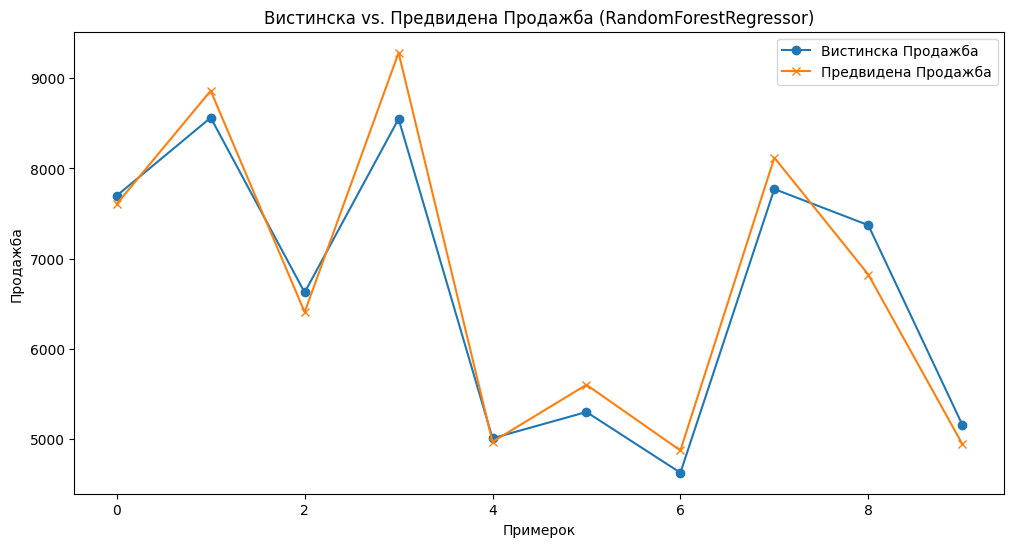

In [57]:
mse = mean_squared_error(y_test_original, predictions)
print(f'Mean Squared Error: {mse}')
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Вистинска Продажба', marker='o')
plt.plot(predictions, label='Предвидена Продажба', marker='x')
plt.title('Вистинска vs. Предвидена Продажба (RandomForestRegressor)')
plt.xlabel('Примерок')
plt.ylabel('Продажба')
plt.legend()
plt.show()

Mean Squared Error (Linear Regression): 53705.5015540111


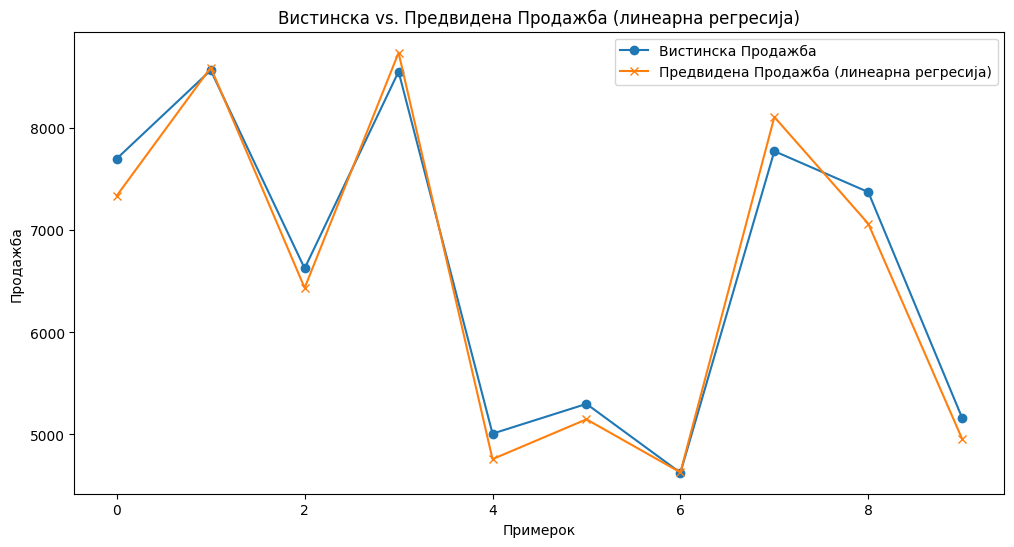

In [58]:
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

predictions_linear = linear_model.predict(X_test)

predictions_linear = scaler_y.inverse_transform(predictions_linear.reshape(-1, 1))


y_test_original = scaler_y.inverse_transform(y_test)


mse_linear = mean_squared_error(y_test_original, predictions_linear)
print(f'Mean Squared Error (Linear Regression): {mse_linear}')
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Вистинска Продажба', marker='o')
plt.plot(predictions_linear, label='Предвидена Продажба (линеарна регресија)', marker='x')
plt.title('Вистинска vs. Предвидена Продажба (линеарна регресија)')
plt.xlabel('Примерок')
plt.ylabel('Продажба')
plt.legend()
plt.show()